<a href="https://www.kaggle.com/code/jahangirbader/extensive-eda-google-play-store-apps?scriptVersionId=155475438" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Google Play Store Apps - EDA**
---

 ***“The illiterate of the 21st century will not be those who cannot read and write, but those who cannot learn, unlearn, and relearn.”***    
                                                                                                                        ― Alvin Toffler

# **1. Introduction**



The Google Play Store, with over 3.5 million apps, is a dynamic hub of innovation. This notebook is inspired by Dr. Ammar Tufail's [video](https://www.youtube.com/live/3KMq1JT2uKg?si=8g2fDvNMq_qTlKyb), I conduct an in-depth analysis, enhancing and innovating upon his methodologies. I meticulously clean and dissect the dataset, exploring trends and revealing narratives behind app success and developer challenges.

Adopting specific methodologies from Dr. Ammar's tutorial, I removed the anamolous column he identified and I refine columns like Reviews, Size, and Installs. I took the cleaning process further by cleaning the categorical column; Genre. And drove the analysis on my own. Rather than mere reproduction, my goal is to enhance, expand, and innovate, revealing new insights along the way. So this notebook goes beyond number-crunching, offering insights into the dynamic world of Google Play Store apps through concise visualizations and tables.

Whether you're a data enthusiast, app developer, or curious user, join me on this expedition into the heart of the Play Store. Let's unravel the secrets hidden in the bytes and pixels, forging our own path in this fascinating, data-driven landscape.



___

# **2. Description**

## **2.1 About Dataset** 

***The following text has been directly copied from the original [dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)***

Context:
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Content:
Each app (row) has values for catergory, rating, size, and more.

Acknowledgements:
This information is scraped from the Google Play Store. This app information would not be available without it.

Inspiration:
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


DATA UPDATED 5 YEARS AGO

## **2.2 About Columns**
### The dataset contains the following 13 columns: 

* App : The name of the app
 
* Category : The category of the app
 
* Rating : The rating of the app in the Play Store
 
* Reviews : The number of reviews of the app
 
* Size : The size of the app
 
* Install : The number of installs of the app
 
* Type : The type of the app (Free/Paid)
 
* Price : The price of the app (0 if it is Free)
 
* Content Rating : The appropiate target audience of the app
 
* Genres: The genre of the app
 
* Last Updated : The date when the app was last updated

* Current Ver : The current version of the app
 
* Android Ver : The minimum Android version required to run the app

___

# **3. Loading Libraries and the Dataset**

## **3.1 Importing Libraries**

In [1]:
# Data
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **3.2 Loading the Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')

## **3.3 Important steps**

### Hide warnings and set display options to max columns and rows

In [3]:
# set options to maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

___

# **4. Data Exploration** 

## 4.1 Viewing the first five rows

In [4]:
# Viewing the first 5 rows
df.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

## 4.2 Viewing the column names

In [5]:
# Viewing the Column names
print(f"The Names of the Columns are as follows: {df.columns}")

The Names of the Columns are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


## 4.3 Viewing number of rows and columns

In [6]:
# Viewing number of rows and columns
print(f"The number of rows are: {df.shape[0]} and columns are: {df.shape[1]}")

The number of rows are: 10841 and columns are: 13


## 4.4 Exploring Data Types

### 4.4.1 Viewing information about the columns

In [7]:
# Viewing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 4.4.2 Viewing Statistical description of numeric columns

In [8]:
# Viewing statistical description of numeric columns
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

### 4.4.3 Viewing Data types of Columns

In [9]:
# Viewing data types of Columns
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 4.5 Identifying duplicate rows

In [10]:
# Identify sum of duplicate rows
duplicates = df[df.duplicated()]

df.duplicated().sum()

483

## 4.6 Identifying missing values

### 4.6.1 Identifying sum of missing values in each column

In [11]:
# Calculate the total number of missing values in each column
missing_values = df.isnull().sum()

### 4.6.2 Identifying percentage of missing values in each column

In [12]:
# Calculating percentage of missing values in each column

# Calculate the total number of values in each column
total_values = df.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / total_values) * 100

# Display the missing percentage for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


## 4.7 Exploring Categorical Columns

### 4.7.1 Exploring Category Column

In [13]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

##### Category Column seems to have unique values so we will let it be and run all analysis with filters

### 4.7.2 Exploring Genres Column

In [15]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [16]:
df['Genres'].value_counts()

Genres
Tools                                    842
Entertainment                            623
Education                                549
Medical                                  463
Business                                 460
Productivity                             424
Sports                                   398
Personalization                          392
Communication                            387
Lifestyle                                381
Finance                                  366
Action                                   365
Health & Fitness                         341
Photography                              335
Social                                   295
News & Magazines                         283
Shopping                                 260
Travel & Local                           257
Dating                                   234
Books & Reference                        231
Arcade                                   220
Simulation                               200
Cas

### 4.7.3 Observations of categorical columns:

* Genres column has too many unique values
##### If an app falls into multiple genres it is being treated as a unique genre so will have to split them at ';' and create seperate columns for additional genres

## **4.8 Summary of Data Exploration**

#### Duplicates

There are duplicates in the dataset which need to be removed

#### Issue in the numeric columns
The following columns are numeric according to their description so they should be either float or int instead of object:
* Reviews
* Size
* Installs
* Price

#### Missing Values ###

Missing values in the columns: 'Type', 'Current Ver' and 'Android Ver' are negligible
We can get rid of the rows with such a low number of missing values

The columns of Size have null values that we created by replacing 'Varies with Device' so we will replace those with average size

The Column Rating also has a high number of missing values

#### Issue with categorical columns
Two columns have too many unqiue values:
* Category
* Genres

___

# **5. Data Cleaning**

## **5.1 Removing Duplicates**

### 5.1.1 Identifying sum of Duplicate rows

In [17]:
# Identify sum of duplicate rows
duplicates = df[df.duplicated()]

df.duplicated().sum()

483

### 5.1.2 Dropping Duplicate rows

In [18]:
# Remove duplicates
df = df.drop_duplicates()

### 5.1.3 Verifying the number of rows and columns after dropping duplicates

In [19]:
# Viewing number of rows and columns after dropping duplicates
print(f"The number of rows are: {df.shape[0]} and columns are: {df.shape[1]}")

The number of rows are: 10358 and columns are: 13


## **5.2 Fixing data type of Columns**

### 5.2.1 Identifying and Dropping rows with anamoly

#### There is a row where cells should be in next column 

##### **This can be fixed if the file is downloaded, however we will just drop it while working on this notebook

In [20]:
#Identifying and Dropping anamolous row

# Finding row where rating is 19 (this is the anamolous row that I will drop)
rating_condition = df['Rating'] > 5.0

# Use the boolean mask to filter the DataFrame
rows_with_high_rating = df[rating_condition]

print(rows_with_high_rating)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [21]:
# Drop the anamoulous rows with high ratings
df = df.drop(rows_with_high_rating.index)

### 5.2.2 Converting "Reviews" column to numeric

In [22]:
# Try to convert the 'Reviews' column to numeric values with errors='coerce'
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [23]:
# Verify if Review column has been converted

### 5.2.3 Converting Size column to numeric

In [24]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

#### a. Issues with the column 'Size':
* "Varies with device"
* M
* k

#### b. Verify the number of values with the 3 types of issues

##### Sum of values with 'M' in them

In [25]:
# find the values having M
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8516

##### Sum of values with 'k' in them

In [26]:
# find the values having k
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

315

##### Sum of Values with 'Varies with device'

In [27]:
# find the values having "Varies with device"
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1526

#### c. Converting Size column to bytes

In [28]:
# convert the Size column into bytes

#let's define a function

def convert_size(Size):
    if isinstance(Size, str):
        if 'k' in Size:
            return float(Size.replace('k', "")) * 1024
        elif 'M' in Size:
            return float(Size.replace('M', "")) * 1024 * 1024
        elif 'Varies with device' in Size:
            return np.nan
    return Size

In [29]:
# let's apply the function

df['Size'] = df['Size'].apply(convert_size)

#### d. Renaming 'Size' to 'Size_in_bytes'

In [30]:
#rename the column 
df.rename(columns={"Size": "Size_in_bytes"}, inplace=True)

In [31]:
# Verify if the column name has changed
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_bytes     Installs  Type Price Content Rating  \
0      159     19922944.0      10,000+  Free     0       Everyone   
1      967     14680064.0     500,000+  Free     0       Everyone   
2    87510      9122611.2   5,000,000+  Free     0       Everyone   
3   215644     26214400.0  50,000,000+  Free     0           Teen   
4      967      2936012.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

#### e. Creating new columns 'Size_in_MB' and 'Size_in_KB'

In [32]:
# Create new column 'Size_in_MB'
df['Size_in_MB'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [33]:
# Create new column 'Size_in_KB'
df['Size_in_KB'] = df['Size_in_bytes'].apply(lambda x: x/(1024))

In [34]:
# Verify if new column 'Size_in_MB' and 'Size_in_KB' have been created
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_bytes     Installs  Type Price Content Rating  \
0      159     19922944.0      10,000+  Free     0       Everyone   
1      967     14680064.0     500,000+  Free     0       Everyone   
2    87510      9122611.2   5,000,000+  Free     0       Everyone   
3   215644     26214400.0  50,000,000+  Free     0           Teen   
4      967      2936012.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  Size_in_MB  Size_in_KB  
0  4.0.3 and up        19.0     19456.0  
1  4.0.3 and up        14.0     14336.0  
2  4.0.3 and up         8.7      8908.8  
3    4.2 and up        25.0     25600.0  
4    4.4 and up         2.8      2867.2

### 5.2.4 Converting Installs column to numeric

#### a. Identifying issues in Installs column

In [35]:
# Identifying unique values
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [36]:
# Identifying Counts of values
df['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

#### b. Issues in Installs column:

* Remove "+"
* Remove ","
* Convert the column to numeric

#### c. Removing "+" sign

In [37]:
# Remove '+'
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)

#### d. Removing "," sign

In [38]:
# Remove ','
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)

#### e. Converting the column to numeric

In [39]:
# Converting column to integar
df['Installs'] = df['Installs'].apply(lambda x: int(x))

#### f. Verifying changes

In [40]:
# Verify changes
df['Installs'].value_counts()

Installs
1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: count, dtype: int64

#### g. Identifying unique values and creating a new column "Installs_categories"

In [41]:
# Identifying unique values in the Installs column
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [42]:
# Another column can be created for Installs categories
# Define the bin edges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

# Create labels for the categories
labels = ['0-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-100M', '100M-1B']

# Use the cut function to create the 'Installs_categories' column
df['Installs_categories'] = pd.cut(df['Installs'], bins=bins, labels=labels, include_lowest=True)

#### h. Printing unique values in "Installs_categories" column

In [43]:
df['Installs_categories'].unique()

['1K-10K', '100K-1M', '1M-10M', '10M-100M', '10K-100K', '100M-1B', '100-1K', '0-100']
Categories (8, object): ['0-100' < '100-1K' < '1K-10K' < '10K-100K' < '100K-1M' < '1M-10M' < '10M-100M' < '100M-1B']

### 5.2.5 Converting Price Column to numeric

#### a. Identifying issues in Price column

In [44]:
df['Price'].value_counts()

Price
0          9592
$0.99       146
$2.99       125
$1.99        73
$4.99        70
$3.99        60
$1.49        46
$5.99        27
$2.49        25
$9.99        19
$6.99        12
$399.99      12
$14.99        9
$4.49         9
$3.49         7
$7.99         7
$5.49         5
$8.99         5
$19.99        5
$29.99        5
$6.49         5
$12.99        4
$24.99        4
$1.00         3
$2.00         3
$11.99        3
$8.49         2
$3.95         2
$17.99        2
$13.99        2
$1.70         2
$39.99        2
$10.00        2
$7.49         2
$10.99        2
$16.99        2
$109.99       1
$3.08         1
$2.59         1
$4.80         1
$1.96         1
$19.40        1
$3.90         1
$4.59         1
$15.46        1
$1.20         1
$3.04         1
$4.29         1
$3.28         1
$2.60         1
$2.56         1
$1.26         1
$4.60         1
$28.99        1
$2.95         1
$2.90         1
$1.97         1
$200.00       1
$89.99        1
$394.99       1
$3.61         1
$30.99        1
$1

#### b. The issue with Price column:

The values contain "$" sign

#### c. Checking how many values have "$" sign

In [45]:
# Let's see how many values have '$' sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

765

#### d. Checking how many values don't have "$" sign

In [46]:
# This code counts the sum of values which contain 0 but does not contain '$' sign
df['Price'].loc[df['Price'].str.contains('0') & (~df['Price'].str.contains('\$'))].value_counts().sum()

9592

#### e. Removing "$" sign

In [47]:
# Remove '$'
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

#### f. Verify if changes have been made

In [48]:
# Verify if $ sign has been removed
df['Price'].value_counts()

Price
0         9592
0.99       146
2.99       125
1.99        73
4.99        70
3.99        60
1.49        46
5.99        27
2.49        25
9.99        19
6.99        12
399.99      12
14.99        9
4.49         9
3.49         7
7.99         7
5.49         5
8.99         5
19.99        5
29.99        5
6.49         5
12.99        4
24.99        4
1.00         3
2.00         3
11.99        3
8.49         2
3.95         2
17.99        2
13.99        2
1.70         2
39.99        2
10.00        2
7.49         2
10.99        2
16.99        2
109.99       1
3.08         1
2.59         1
4.80         1
1.96         1
19.40        1
3.90         1
4.59         1
15.46        1
1.20         1
3.04         1
4.29         1
3.28         1
2.60         1
2.56         1
1.26         1
4.60         1
28.99        1
2.95         1
2.90         1
1.97         1
200.00       1
89.99        1
394.99       1
3.61         1
30.99        1
154.99       1
1.61         1
46.99        1
4.85         1
9.00

#### g. Convert Price Column to Numeric

In [49]:
# now convert the Price column into a numeric column
df['Price'] = df['Price'].apply(lambda x: float(x))

### 5.2.6 Viewing Statistical Description of numeric Columns after fixing data types

In [50]:
# Viewing statistical description of numeric columns
df.describe()

Rating       Reviews  Size_in_bytes      Installs         Price  \
count  8892.000000  1.035700e+04   8.831000e+03  1.035700e+04  10357.000000   
mean      4.187877  4.059046e+05   2.232147e+07  1.415776e+07      1.030800   
std       0.522377  2.696778e+06   2.363552e+07  8.023955e+07     16.278625   
min       1.000000  0.000000e+00   8.704000e+03  0.000000e+00      0.000000   
25%       4.000000  3.200000e+01   4.928307e+06  1.000000e+03      0.000000   
50%       4.300000  1.680000e+03   1.363149e+07  1.000000e+05      0.000000   
75%       4.500000  4.641600e+04   3.040870e+07  1.000000e+06      0.000000   
max       5.000000  7.815831e+07   1.048576e+08  1.000000e+09    400.000000   

        Size_in_MB     Size_in_KB  
count  8831.000000    8831.000000  
mean     21.287413   21798.311052  
std      22.540591   23081.565229  
min       0.008301       8.500000  
25%       4.700000    4812.800000  
50%      13.000000   13312.000000  
75%      29.000000   29696.000000  
max     100.000000  102400.000000

### **Performed the following steps in fixing Data Types**:
1. Identified and Dropped Anamolous row
2. Converted Reviews Column to Numeric
3. Converted Size column to numeric by converting the column to 'Size_in_bytes' by replacing 'k' and 'M'
4. Created two more columns Size_in_KB and Size_in_MB (Any one of the Size columns can be dropped, but we will retain these here)
4. Around 1500 values in the Size column were "Varies with Device" which have been imputed with null values
5. Removed '+' and ',' from Installs column and converted it to numeric
6. A new column was created 'Installs_categories'to categorize number of installs
7. '$' sign was removed from the 'Price' column and the column was converted to numeric

## **5.3 Dealing with Missing Values** 

### **5.3.1 Identifying sum of missing values in each column**

In [51]:
# Calculate the total number of missing values in each column
missing_values = df.isnull().sum()

### 5.3.2 Identifying percentage of missing values in each column

In [52]:
# Calculating percentage of missing values in each column

# Calculate the total number of values in each column
total_values = df.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / total_values) * 100

# Display the missing percentage for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
App                     0.000000
Category                0.000000
Rating                 14.145023
Reviews                 0.000000
Size_in_bytes          14.733996
Installs                0.000000
Type                    0.009655
Price                   0.000000
Content Rating          0.000000
Genres                  0.000000
Last Updated            0.000000
Current Ver             0.077242
Android Ver             0.019311
Size_in_MB             14.733996
Size_in_KB             14.733996
Installs_categories     0.000000
dtype: float64


### **5.3.3 Observations**:

Since missing values in the columns: 'Type', 'Current Ver' and 'Android Ver' are negligible
We can get rid of the rows with such a low number of missing values

The columns of Size have null values that we created by replacing 'Varies with Device' so we will replace those with average size

The Column Rating also has a high number of missing values

### **5.3.4 Dropping Rows with missing values in columns: 'Type', 'Current Ver' and 'Android Ver'**

In [53]:
# Dropping Rows with missing values in columns: 'Type', 'Current Ver' and 'Android Ver'
# List of columns with missing values
columns_with_missing_values = ['Type', 'Current Ver', 'Android Ver']

# Drop rows with missing values in the specified columns
df.dropna(subset=columns_with_missing_values, inplace=True)

#### **Verify if the rows with missing values are dropped**

In [54]:
# Verify if missing rows from the columns 'Type', 'Current Ver' and 'Android Ver' are dropped
df.isna().sum()

App                       0
Category                  0
Rating                 1460
Reviews                   0
Size_in_bytes          1525
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Size_in_MB             1525
Size_in_KB             1525
Installs_categories       0
dtype: int64

### **5.3.5 Dealing with Missing Values in Size columns**

In [55]:
#Filling Null values in Size columns with average size of apps

# Calculate the average of non-null values in the 'Size_in_bytes' column
average_size_in_bytes = df['Size_in_bytes'].mean()

# Fill missing values in 'Size_in_bytes' with the average
df['Size_in_bytes'].fillna(average_size_in_bytes, inplace=True)

# Calculate the corresponding values for 'Size_in_MB' and 'Size_in_KB' columns
average_size_in_MB = average_size_in_bytes / (1024 * 1024)
average_size_in_KB = average_size_in_bytes / 1024

# Fill missing values in 'Size_in_MB' and 'Size_in_KB' with the calculated averages
df['Size_in_MB'].fillna(average_size_in_MB, inplace=True)
df['Size_in_KB'].fillna(average_size_in_KB, inplace=True)

In [56]:
# Verify if missing values in size columns have been filled
df.isna().sum()

App                       0
Category                  0
Rating                 1460
Reviews                   0
Size_in_bytes             0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Size_in_MB                0
Size_in_KB                0
Installs_categories       0
dtype: int64

### **5.3.6 Dealing with Missing Values in Rating column**

#### Since Rating is dependent on several factors such as Type, Category, Price, Quality of app etc we will not impute or remove the missing values in the Rating column

### **5.3.7 Statistical Summary**

### Generating statistical summary for numeric columns after cleaning data

In [57]:
# Generating statistical summary for numeric columns after fixing data types and dealing with missing values
df.describe()

Rating       Reviews  Size_in_bytes      Installs         Price  \
count  8886.000000  1.034600e+04   1.034600e+04  1.034600e+04  10346.000000   
mean      4.187959  4.063338e+05   2.234121e+07  1.417266e+07      1.031561   
std       0.522428  2.698179e+06   2.182906e+07  8.028090e+07     16.287252   
min       1.000000  0.000000e+00   8.704000e+03  0.000000e+00      0.000000   
25%       4.000000  3.200000e+01   5.976883e+06  1.000000e+03      0.000000   
50%       4.300000  1.688500e+03   1.782579e+07  1.000000e+05      0.000000   
75%       4.500000  4.659825e+04   2.726298e+07  1.000000e+06      0.000000   
max       5.000000  7.815831e+07   1.048576e+08  1.000000e+09    400.000000   

         Size_in_MB     Size_in_KB  
count  10346.000000   10346.000000  
mean      21.306240   21817.589854  
std       20.817818   21317.445542  
min        0.008301       8.500000  
25%        5.700000    5836.800000  
50%       17.000000   17408.000000  
75%       26.000000   26624.000000  
max      100.000000  102400.000000

### **5.3.8 Summary of Dealing with Missing Values**

1. Dropped Missing values in the columns 'Type', 'Current Ver' and 'Android Ver'

2. Replaced Nan values in size columns with average size of apps in the the columns

3. Ratings are rather dificult to assume and impute to so we will let them be

## **5.4 Dealing with issues in categorical columns**

### 5.4.1 Observations:

* Genres column has too many unique values

### 5.4.2 Exploring Genres Column

In [58]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [59]:
df['Genres'].value_counts()

Genres
Tools                                    840
Entertainment                            587
Education                                526
Business                                 427
Medical                                  408
Productivity                             407
Personalization                          386
Lifestyle                                372
Communication                            366
Sports                                   364
Finance                                  360
Action                                   356
Photography                              322
Health & Fitness                         306
Social                                   280
News & Magazines                         264
Travel & Local                           236
Books & Reference                        229
Shopping                                 224
Arcade                                   218
Simulation                               199
Dating                                   196
Cas

#### a. Observation about 'Genres' Column
##### If an app falls into multiple genres it is being treated as a unique genre so will have to split them at ';' and create seperate columns for additional genres



##### b. Values with ";" sign

In [60]:
# Finding out how many values have ";" meaning they have multiple Genres
df['Genres'].loc[df['Genres'].str.contains(';')].value_counts().sum()

462

##### c. Values without ";"

In [61]:
df['Genres'].loc[~df['Genres'].str.contains(';')].value_counts().sum()

9884

### **5.4.3 Creating new columns from Genres column**

In [62]:
# Split the 'Genres' column by semicolon into a list of genres
df['Genre List'] = df['Genres'].str.split(';')

#### a. Identifying maximum number of genres in a row in the 'Genre' column

In [63]:
# Calculate the maximum number of genres in any entry
max_genres = df['Genre List'].apply(len).max()

print(max_genres)

2


#### b. Creating new columns 'Genre1' and 'Genre2' for rows where there are two genres

In [64]:
# Create new columns for each genre (up to the maximum)
for i in range(max_genres):
    df[f'Genre{i + 1}'] = df['Genre List'].apply(lambda x: x[i] if len(x) > i else None)

#### c. Verifying if new columns have been created

In [65]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size_in_bytes  Installs  Type  Price Content Rating  \
0      159     19922944.0     10000  Free    0.0       Everyone   
1      967     14680064.0    500000  Free    0.0       Everyone   
2    87510      9122611.2   5000000  Free    0.0       Everyone   
3   215644     26214400.0  50000000  Free    0.0           Teen   
4      967      2936012.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  Size_in_MB  Size_in_KB Installs_categories  \
0  4.0.3 and up        19.0     19456.0              1K-10K   
1  4.0.3 and up        14.0     14336.0             100K-1M   
2  4.0.3 and up         8.7      8908.8              1M-10M   
3    4.2 and up        25.0     25600.0            10M-100M   
4    4.4 and up         2.8      2867.2            10K-100K   

                     Genre List        Genre1        Genre2  
0                [Art & Design]  Art & Design          None  
1  [Art & Design, Pretend Play]  Art & Design  Pretend Play  
2                [Art & Design]  Art & Design          None  
3                [Art & Design]  Art & Design          None  
4    [Art & Design, Creativity]  Art & Design    Creativity

In [66]:
df['Genre1'].value_counts()

Genre1
Tools                      841
Entertainment              627
Education                  609
Business                   427
Medical                    408
Productivity               407
Personalization            386
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          232
Shopping                   224
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     161
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   108
Educational                106
Adventure                   91
A

In [67]:
df['Genre2'].value_counts()

Genre2
Action & Adventure    128
Education             107
Pretend Play           80
Brain Games            69
Music & Video          41
Creativity             37
Name: count, dtype: int64

## **5.5 Data Cleaning Summary**

### **Removing duplicates**
There were 483 duplicates rows which were removed

### **Fixed Data Types**:
1. Identified and Dropped Anamolous row
2. Converted Reviews Column to Numeric
3. Converted Size column to numeric by converting the column to 'Size_in_bytes' by replacing 'k' and 'M'
4. Created two more columns Size_in_KB and Size_in_MB (Any one of the Size columns can be dropped, but we will retain these here)
4. Around 1500 values in the Size column were "Varies with Device" which have been imputed with null values
5. Removed '+' and ',' from Installs column and converted it to numeric
6. A new column was created 'Installs_categories'to categorize number of installs
7. '$' sign was removed from the 'Price' column and the column was converted to numeric

### **Dealing with missing values**
1. Dropped Missing values in the columns 'Type', 'Current Ver' and 'Android Ver'
2. Replaced Nan values in size columns with average size of apps in the the columns
3. Ratings are rather dificult to assume and impute to so we will let them be

### **Dealing with categorical columns**
1. Category column has been kept as it is as it has too many unique values so filters have to be applied for analysis
2. Some values in Genre column had two genres so they have been split into two columns; Genre1 and Genre2

___

# **6. Data Profiling**

## Generating an Extensive Profile Report of the data

In [68]:
# Import the ProfileReport class from the ydata_profiling library
from ydata_profiling import ProfileReport

# Create a comprehensive profile report for the DataFrame 'df'
# This report will contain various statistics, insights, and visualizations about the data
profile = ProfileReport(df, title='Data Profile Report')

#profile                     # or this one
profile.to_notebook_iframe() # use this line to show the output

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Key findings:
* Total Number of Rows: 10346

* There are 6 new columns created raising the total number of columns to 19

* There are 9584 Free Apps and 762 Paid Apps in the dataset

* Minimum price of app is 0, Maximum price is 400 and average price is around 1.03

* The 11344 missing values in the report are missing values in Genre2(9884) and Ratings(1460)

* Top categories of apps are Family, Game and Tools.
---

# **7. Data Analysis**

## **Analysis through Tables and Visualizations**

### What are the top apps based on number of installs?

In [69]:
top_apps = df.sort_values(by='Installs', ascending=False).drop_duplicates(subset='App').head(10)
print("The following are the top apps based on the number of Installs:")
print(top_apps[['App']])

The following are the top apps based on the number of Installs:
                            App
336          WhatsApp Messenger
2554                    Google+
3127         Google Street View
3816                Google News
3223  Maps - Navigate & Explore
2545                  Instagram
2544                   Facebook
865           Google Play Games
3234                     Google
451                       Gmail


### What are top apps based on number of reviews?

In [70]:
top_apps_by_reviews = df.sort_values(by='Reviews', ascending=False).drop_duplicates(subset='App').head(10)
print("The following are the top 10 apps based on the number of reviews:")
print(top_apps_by_reviews[['App', 'Reviews']])

The following are the top 10 apps based on the number of reviews:
                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2604                                          Instagram  66577446
382            Messenger – Text and Video Chat for Free  56646578
1879                                     Clash of Clans  44893888
4005            Clean Master- Space Cleaner & Antivirus  42916526
1872                                     Subway Surfers  27725352
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1878                                       Clash Royale  23136735


### What are the top apps based on highest number of reviews and a rating above 4.5?

In [71]:
# Filter for apps with a rating over 4.5
high_rating_apps = df[df['Rating'] > 4.5]

# Sort the filtered DataFrame by the number of reviews in descending order
top_apps = high_rating_apps.sort_values(by='Reviews', ascending=False)

# Drop duplicates based on the 'App' column
top_apps = top_apps.drop_duplicates(subset='App').head(10)

# Print the top apps based on the highest number of reviews, rating over 4.5, and excluding duplicates
print("The following are the top apps based on the highest number of reviews, rating over 4.5, and excluding duplicates:")
print(top_apps[['App', 'Reviews', 'Rating']])

The following are the top apps based on the highest number of reviews, rating over 4.5, and excluding duplicates:
                                                    App   Reviews  Rating
1879                                     Clash of Clans  44893888     4.6
4005            Clean Master- Space Cleaner & Antivirus  42916526     4.7
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999     4.7
1878                                       Clash Royale  23136735     4.6
4568    360 Security - Free Antivirus, Booster, Cleaner  16771865     4.6
7937                                     Shadow Fight 2  10981850     4.6
1902                           Dream League Soccer 2018   9883806     4.6
4688             VivaVideo - Video Editor & Photo Movie   9879473     4.6
1763                                     Piano Tiles 2™   8118880     4.7
3255                         SHAREit - Transfer & Share   7790693     4.6


### What are the top 5 Categories based on highest number of Apps?

In [72]:
# Count the number of apps in each category and find the top 5
top_categories = df['Category'].value_counts().head(5)

# Print the top 5 categories
print("Top 5 Categories Based on Number of Apps:")
print(top_categories)

Top 5 Categories Based on Number of Apps:
Category
FAMILY      1939
GAME        1121
TOOLS        841
BUSINESS     427
MEDICAL      408
Name: count, dtype: int64


### What are the top 5 Genres based on highest number of Apps?

In [73]:
genre_counts = df['Genres'].str.split(';').explode().value_counts()

# Get the top 5 genres
top5_genres = genre_counts.head(5)

# Print the top 5 genres
print("Top 5 Genres:")
print(top5_genres)

Top 5 Genres:
Genres
Tools            841
Education        716
Entertainment    627
Business         427
Medical          408
Name: count, dtype: int64


### What is the share of Free and Paid Apps?

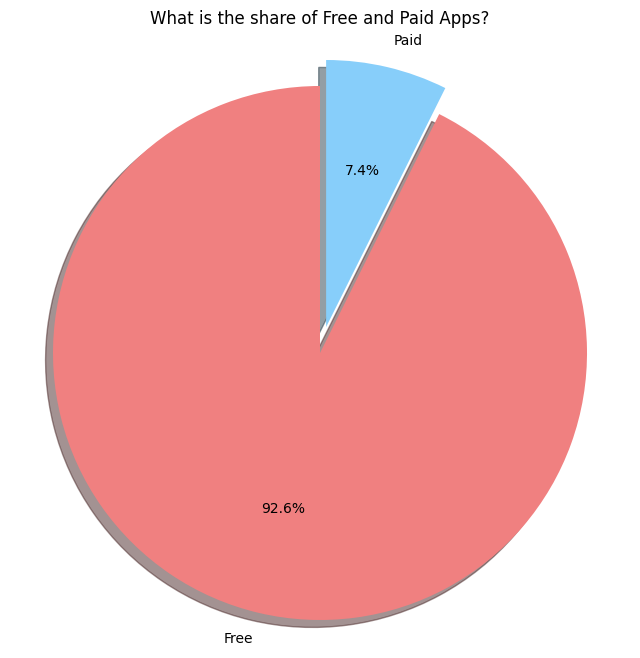

In [74]:
# Count the occurrences of each type
type_counts = df['Type'].value_counts()

# Create a color palette with softer and more contrasting colors
colors = ['lightcoral', 'lightskyblue']

# Explode the 'Free' slice for emphasis
explode = (0.1, 0)

# Plotting the pie chart with updated design choices
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('What is the share of Free and Paid Apps?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### What are the top 5 Categories for Paid Apps

In [75]:
# Filter for non-free (paid) apps
paid_apps = df[df['Price'] > 0]

# Count the number of paid apps in each category and find the top 5
top_categories_paid = paid_apps['Category'].value_counts().head(5)

# Print the top 5 categories for paid apps
print("Top 5 Categories for Paid Apps:")
print(top_categories_paid)

Top 5 Categories for Paid Apps:
Category
FAMILY             186
MEDICAL             84
GAME                83
PERSONALIZATION     81
TOOLS               77
Name: count, dtype: int64


### What are the top 5 Genres for Paid Apps?

In [76]:
# Filter for non-free (paid) apps
paid_apps = df[df['Price'] > 0]

# Count the number of paid apps in each genre and find the top 5
top_categories_paid = paid_apps['Genres'].value_counts().head(5)

# Print the top 5 genres for paid apps
print("Top 5 Genres for Paid Apps:")
print(top_categories_paid)

Top 5 Genres for Paid Apps:
Genres
Medical              84
Personalization      81
Tools                77
Education            30
Books & Reference    28
Name: count, dtype: int64


### What is the Price distribution of Paid Apps?

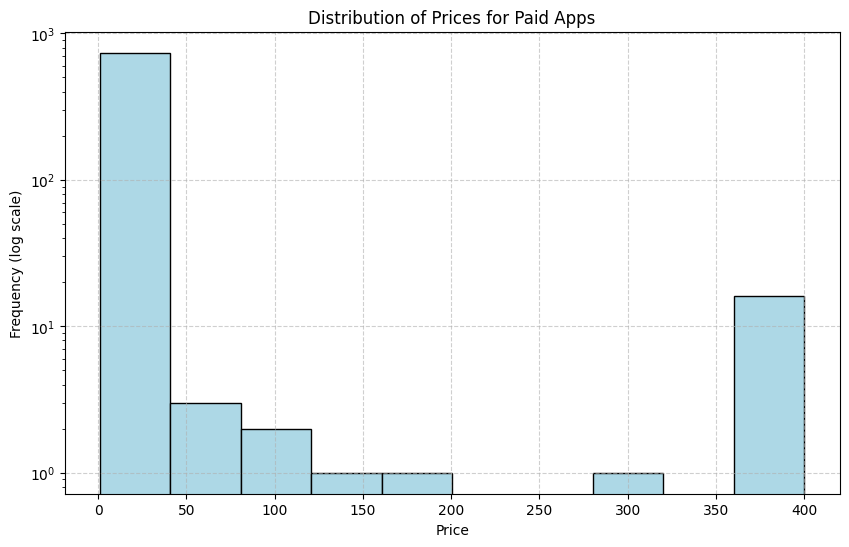

In [77]:
# Filter for paid apps
paid_apps = df[df['Price'] != 0]

# Create a histogram or bar chart with a logarithmic y-axis
plt.figure(figsize=(10, 6))
plt.hist(paid_apps['Price'], bins=10, color='lightblue', edgecolor='black', log=True)

# Customize the chart
plt.title('Distribution of Prices for Paid Apps')
plt.xlabel('Price')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the chart
plt.show()

### What is the distribution of Prices for Paid Apps by Category?

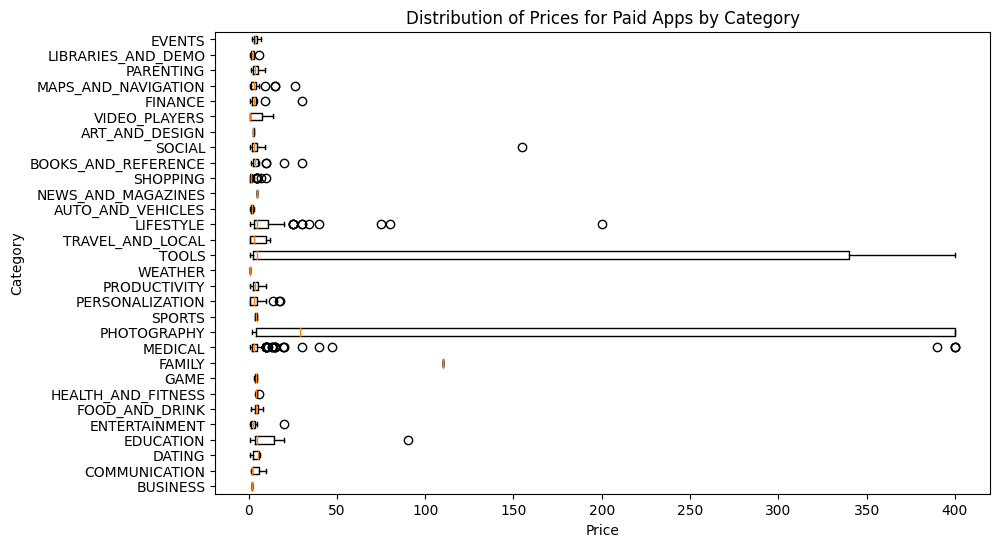

In [78]:
# Filter for paid apps
paid_apps = df[df['Price'] > 0]

# Create a horizontal box plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size

# Customize the chart
plt.title('Distribution of Prices for Paid Apps by Category')
plt.xlabel('Price')
plt.ylabel('Category')

# Create the horizontal box plot
plt.boxplot([group['Price'] for name, group in paid_apps.groupby('Category')],
            labels=paid_apps['Category'].unique(),
            vert=False)  # Set vert=False for horizontal plot

# Show the chart
plt.show()

### What type of apps are charging more than $100

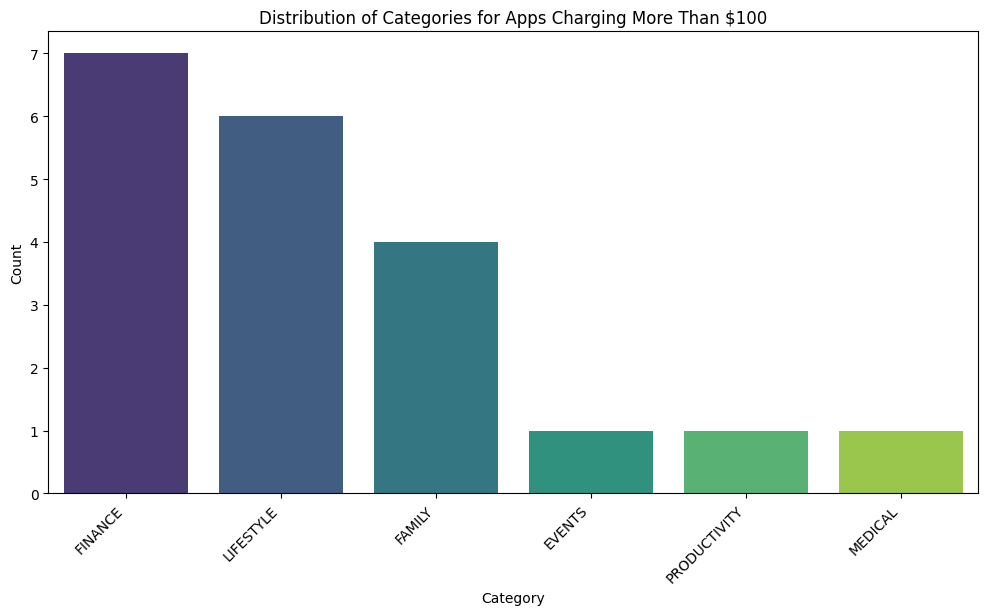

In [79]:
# Filter for apps that charge more than $100
expensive_apps = df[df['Price'] > 100]

# Create a count plot for the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=expensive_apps, palette='viridis', order=expensive_apps['Category'].value_counts().index)

# Customize the chart
plt.title('Distribution of Categories for Apps Charging More Than $100')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Optional: rotate x-axis labels for better visibility

# Show the chart
plt.show()

### What types of apps are charging more than $350?

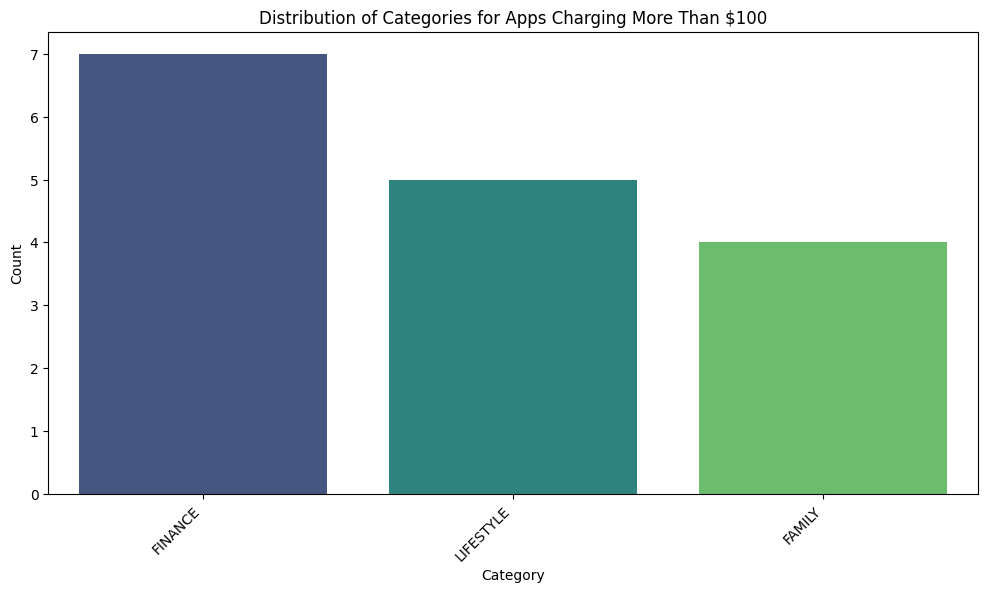

In [80]:
# Filter for apps that charge more than $100
expensive_apps = df[df['Price'] > 350]

# Create a count plot for the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=expensive_apps, palette='viridis', order=expensive_apps['Category'].value_counts().index)

# Customize the chart
plt.title('Distribution of Categories for Apps Charging More Than $100')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Optional: rotate x-axis labels for better visibility

# Show the chart
plt.show()

### Is there a correlation between Price and Rating of Apps?

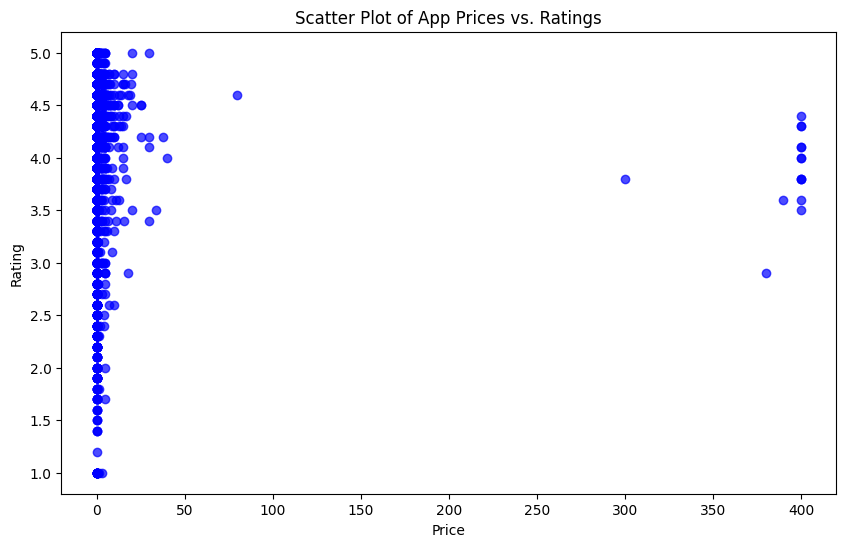

In [81]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: set the figure size

# Customize the chart
plt.title('Scatter Plot of App Prices vs. Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')

# Create the scatter plot
plt.scatter(df['Price'], df['Rating'], color='blue', alpha=0.7)

# Show the chart
plt.show()

### What is the average price of Apps by Content Rating?

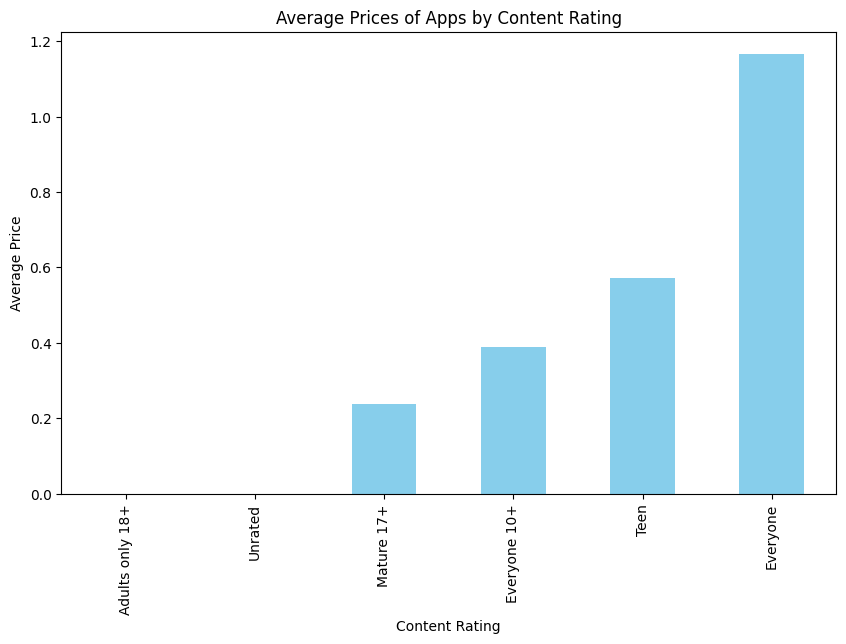

In [82]:
# Group and calculate the average prices for each content rating
average_prices = df.groupby('Content Rating')['Price'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Optional: set the figure size

# Customize the chart
plt.title('Average Prices of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Price')

# Create the bar chart
average_prices.plot(kind='bar', color='skyblue')

# Show the chart
plt.show()

### Which are top 5 genres in terms of price?

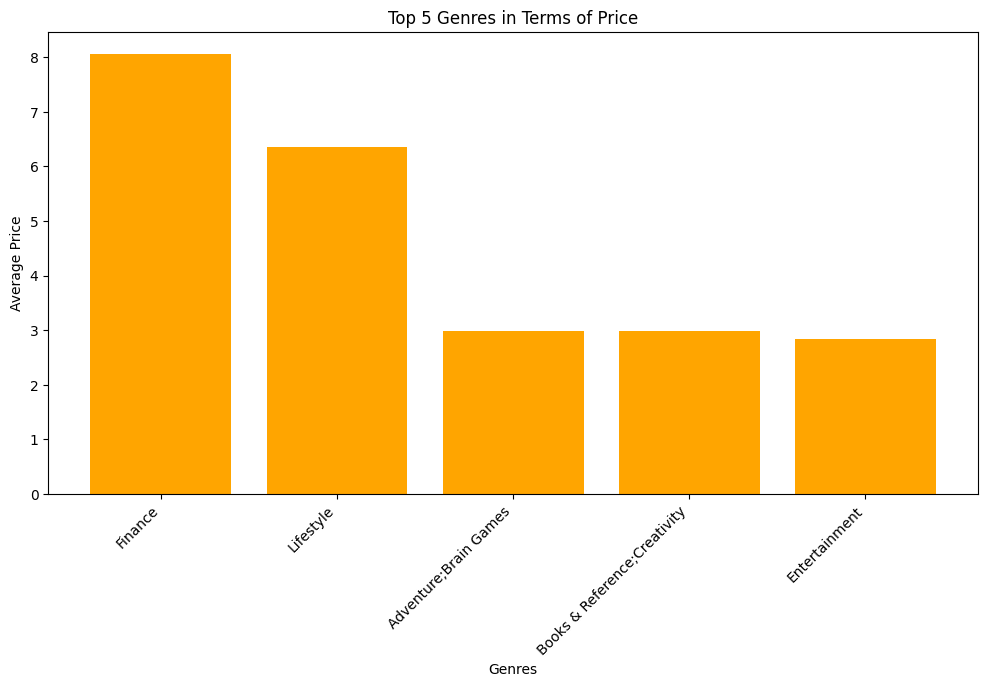

In [83]:
# Group by 'Genres' and calculate the average price for each genre
average_prices = df.groupby('Genres')['Price'].mean().sort_values(ascending=False)

# Get the top 5 genres by price
top5_genres = average_prices.head(5)

# Create a bar chart to visualize the average prices for the top 5 genres
plt.figure(figsize=(12, 6))  # Optional: set the figure size

# Customize the chart
plt.bar(top5_genres.index, top5_genres, color='orange')

plt.title('Top 5 Genres in Terms of Price')
plt.xlabel('Genres')
plt.ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.show()

### What is the Average price of Apps for the top 10 Genres?

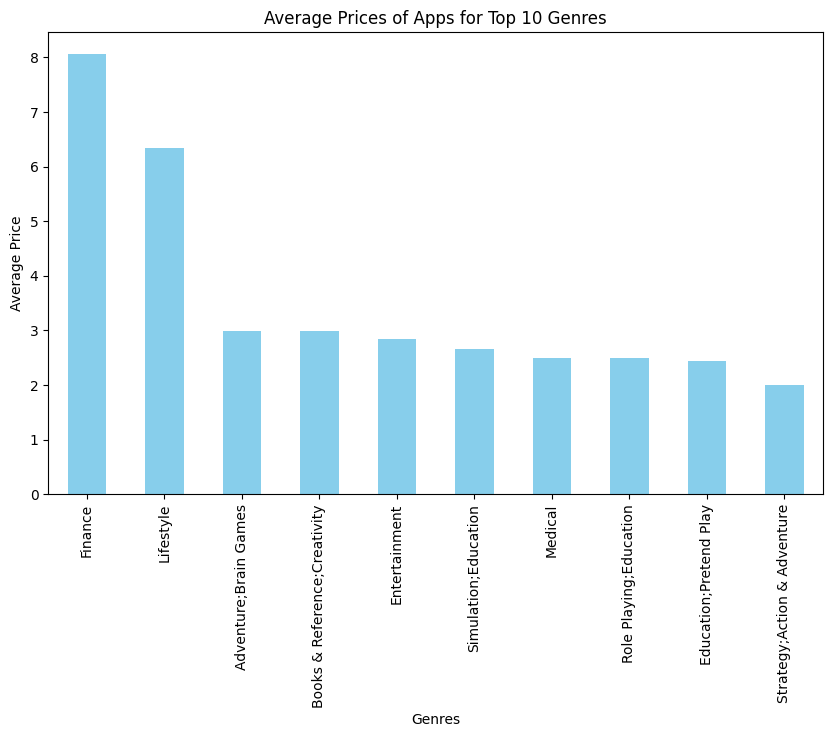

In [84]:
# Get the top 10 genres by average price
top_10_genres = df.groupby('Genres')['Price'].mean().sort_values(ascending=False).head(10)

# Create a grouped bar chart for the top 10 genres
plt.figure(figsize=(10, 6))  # Optional: set the figure size

# Customize the chart
plt.title('Average Prices of Apps for Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Price')

# Create the grouped bar chart
top_10_genres.plot(kind='bar', color='skyblue')

# Show the chart
plt.show()

### How is the quality of the Apps in the dataset?

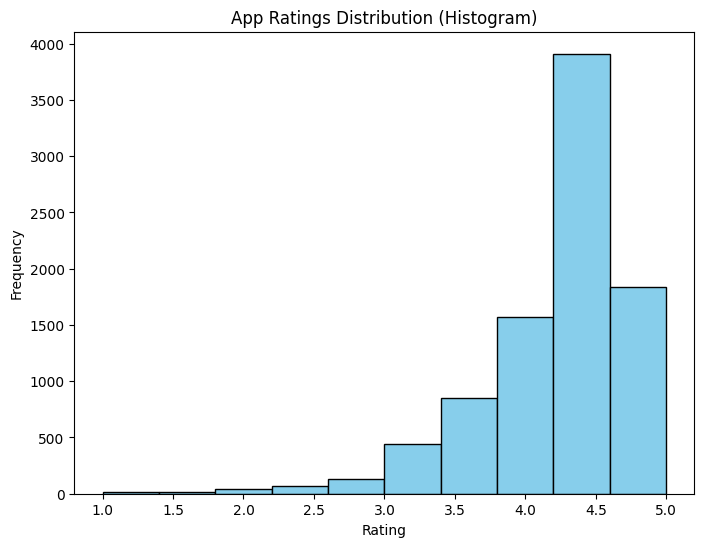

In [85]:
# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 6))  # Optional: set the figure size

# Customize the chart
plt.title('App Ratings Distribution (Histogram)')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Create the histogram
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')

# Show the chart
plt.show()

### What is the size distribution of Apps?

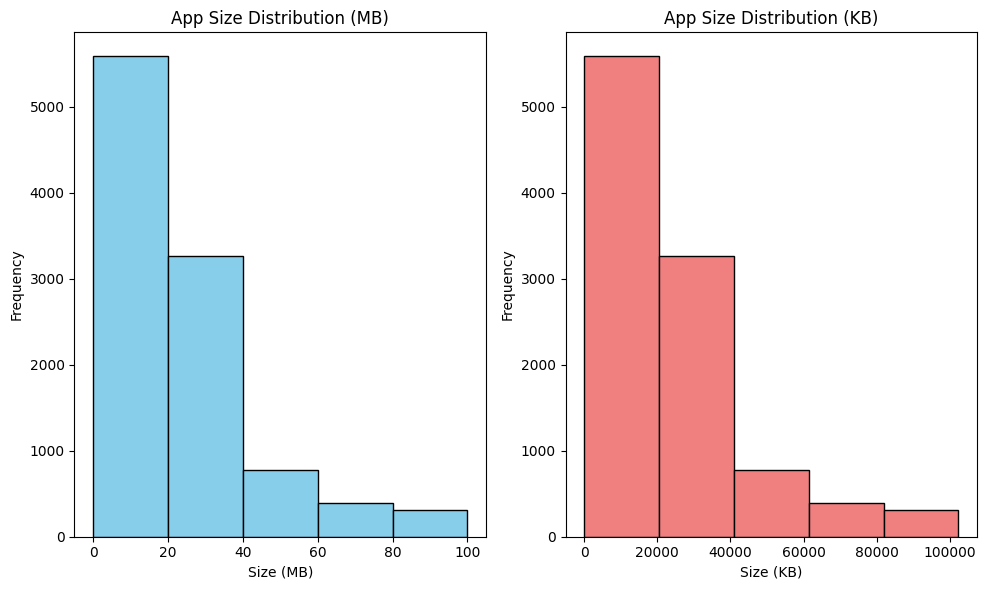

In [86]:
# Create histograms to visualize the distribution of app sizes in both MB and KB
plt.figure(figsize=(10, 6))  # Optional: set the figure size

# Customize the chart for Size in MB
plt.subplot(1, 2, 1)
plt.title('App Size Distribution (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.hist(df['Size_in_MB'], bins=5, color='skyblue', edgecolor='black')

# Customize the chart for Size in KB
plt.subplot(1, 2, 2)
plt.title('App Size Distribution (KB)')
plt.xlabel('Size (KB)')
plt.ylabel('Frequency')
plt.hist(df['Size_in_KB'], bins=5, color='lightcoral', edgecolor='black')

# Adjust layout
plt.tight_layout()

# Show the charts
plt.show()

### How many Apps are there in each Content Category?

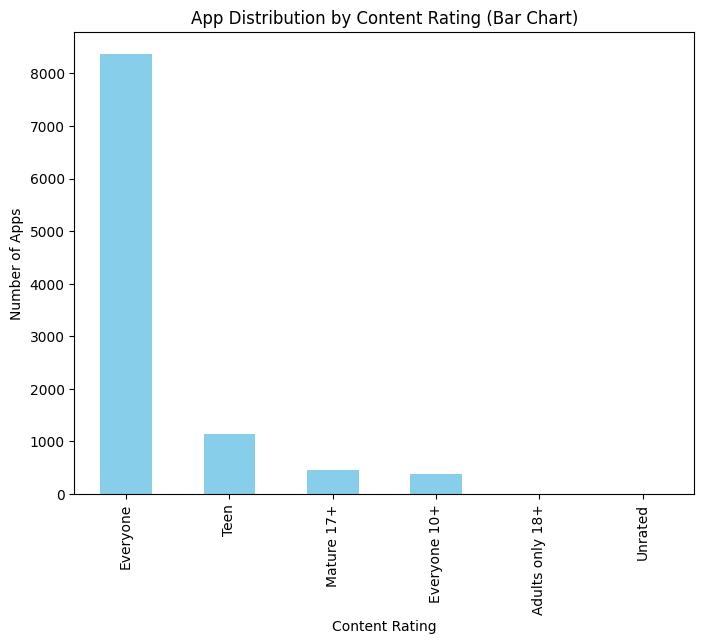

In [87]:
# Count the number of apps in each content rating category
content_rating_counts = df['Content Rating'].value_counts()

# Create a bar chart to visualize the distribution of apps among content rating categories
plt.figure(figsize=(8, 6))  # Optional: set the figure size

# Customize the chart
plt.title('App Distribution by Content Rating (Bar Chart)')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')

# Create the bar chart
content_rating_counts.plot(kind='bar', color='skyblue')

# Show the chart
plt.show()

### Distribution of Apps by Current App Version and Minimum Android Version

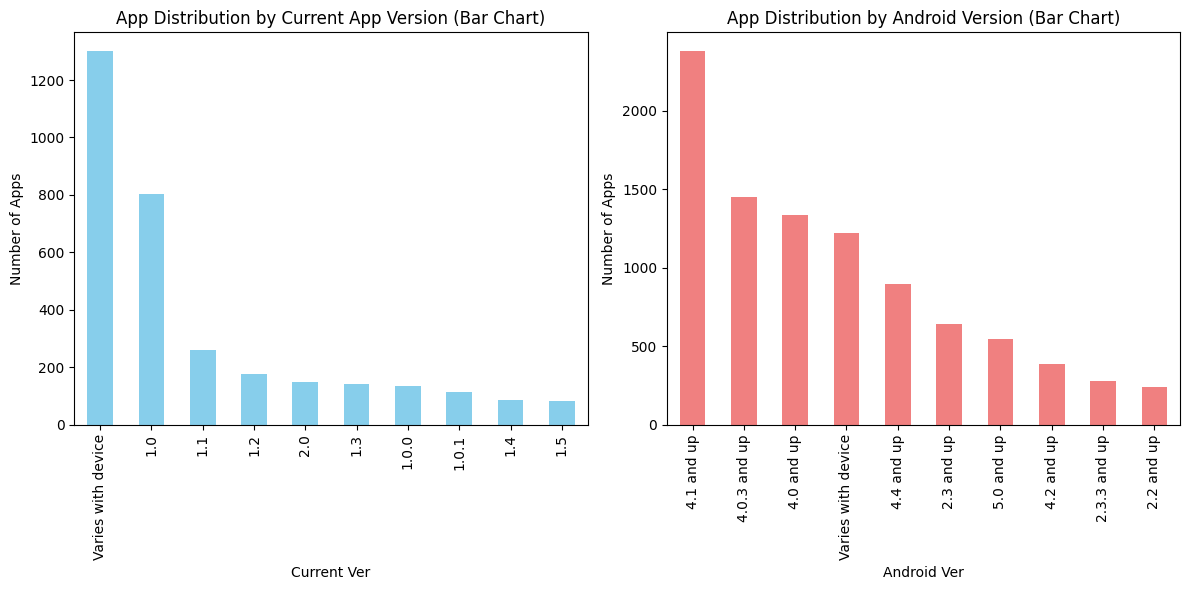

In [88]:
# Count the number of apps for each current app version
current_ver_counts = df['Current Ver'].value_counts()

# Count the number of apps for each minimum Android version
android_ver_counts = df['Android Ver'].value_counts()

# Create bar charts to visualize the distribution of current app versions and Android versions
plt.figure(figsize=(12, 6))  # Optional: set the figure size

# Customize the chart for current app versions
plt.subplot(1, 2, 1)
plt.title('App Distribution by Current App Version (Bar Chart)')
plt.xlabel('Current Ver')
plt.ylabel('Number of Apps')
current_ver_counts.head(10).plot(kind='bar', color='skyblue')

# Customize the chart for Android versions
plt.subplot(1, 2, 2)
plt.title('App Distribution by Android Version (Bar Chart)')
plt.xlabel('Android Ver')
plt.ylabel('Number of Apps')
android_ver_counts.head(10).plot(kind='bar', color='lightcoral')

# Adjust layout
plt.tight_layout()

# Show the charts
plt.show()

### How many Apps are there in each Installs Category?

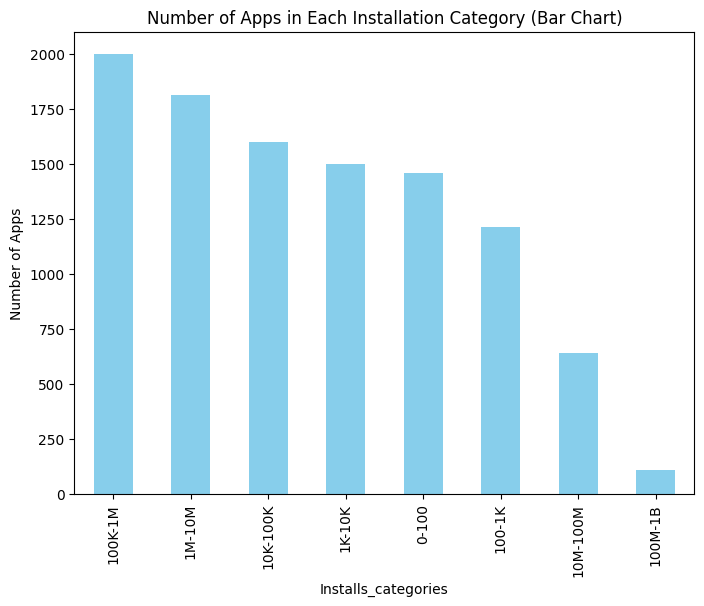

In [89]:
# Count the number of apps in each installation category
install_counts = df['Installs_categories'].value_counts()

# Create a bar chart to visualize the number of apps in each installation category
plt.figure(figsize=(8, 6))  # Optional: set the figure size

# Customize the chart
plt.title('Number of Apps in Each Installation Category (Bar Chart)')
plt.xlabel('Installs Categories')
plt.ylabel('Number of Apps')

# Create the bar chart
install_counts.plot(kind='bar', color='skyblue')

# Show the chart
plt.show()

## Thank you for visiting this notebook!

## Please hit the upvote button if this was insightful

## What other questions would you ask from this data?